In [1]:
import pandas as pd
import numpy as np

# 1. LOAD DATA

In [2]:
# Load data
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
# Load Validation data
df_val = pd.read_csv('./data/validation_dataset.csv')
df_val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [4]:
# Print shapes
print(df.shape)
print(df_val.shape)

(1338, 7)
(50, 6)


# 2. EDA

In [5]:
# Statisitical analysis
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [6]:
df_val.describe()

,age,bmi,children
count,50.000000,50.000000,50.000000
mean,46.820000,39.539907,2.780000
std,21.681074,17.725844,4.026899
min,18.000000,18.715000,0.000000
25%,28.000000,27.575000,0.000000
50%,44.500000,33.807500,1.000000
75%,60.750000,40.208750,2.750000
max,92.000000,89.097296,13.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [8]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [9]:
df.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [10]:
df_val.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

# 3. PREPROCESSING

In [11]:
# Check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [12]:
df.age

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334   -18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [13]:
# Convert negative age to postive
df['age'] = abs(df['age'])
df.age

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

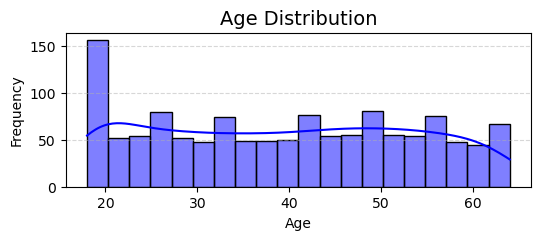

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting age distibution
plt.figure(figsize=(6,2))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

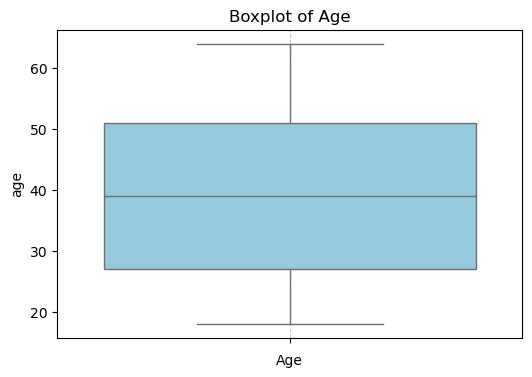

In [15]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(df['age'], color='skyblue')
plt.title('Boxplot of Age', fontsize=12)
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_108053/312208576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='Set2')


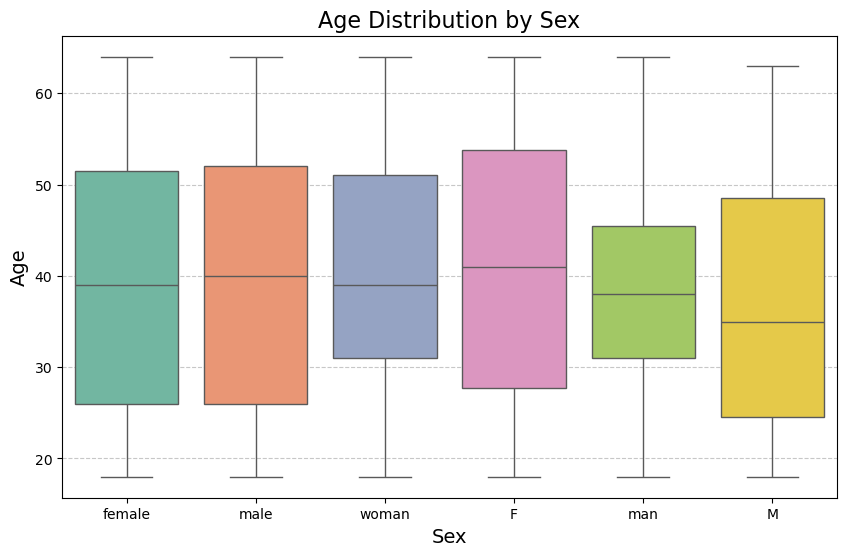

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [17]:
df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object)

In [18]:
# Map sex to male and female
sex_mapping = {
    'female': 'Female',
    'woman': 'Female',
    'Woman': 'Female',
    'F': 'Female',
    'f': 'Female',
    'male': 'Male',
    'man': 'Male',
    'Man': 'Male',
    'M': 'Male',
    'm':'Male',
    }

# Appply mapping
df['sex'] = df['sex'].map(sex_mapping)
df['sex'].unique()

array(['Female', 'Male', nan], dtype=object)

In [19]:
df['sex'].isnull().sum()

66

In [20]:
# bmi
df['bmi'].isnull().sum()

66

In [21]:
df['children'] = abs(df['children'])

In [22]:
df.children.unique()

array([ 0.,  1.,  3.,  2., nan,  4.,  5.])

In [23]:
df.smoker.isnull().sum()

66

In [24]:
# Mising data in each column
df.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [25]:
# Check percentage of Null Values
perc = round(((df.isnull().sum())/len(df) *100),2)

perc.apply(lambda x: f'{x:.2f}%')

age         4.93%
sex         4.93%
bmi         4.93%
children    4.93%
smoker      4.93%
region      4.93%
charges     4.04%
dtype: object

In [26]:
# Check for rows that are entirely null
df[df.isnull().all(axis=1)]

,age,sex,bmi,children,smoker,region,charges
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.isnull().all(axis=1).sum()

2

In [28]:
# Check for columns that are entirely null
df.columns[df.isnull().all(axis=0)]

Index([], dtype='object')

In [29]:
# Remove rows with entirely empty
df_cleaned_rows = df.dropna(how='all').reset_index(drop=True)
df_cleaned_rows

,age,sex,bmi,children,smoker,region,charges
0,19.0,Female,27.900,0.0,yes,southwest,16884.924
1,18.0,Male,33.770,1.0,no,Southeast,1725.5523
2,28.0,Male,33.000,3.0,no,southeast,$4449.462
3,33.0,Male,22.705,0.0,no,northwest,$21984.47061
4,32.0,Male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1331,50.0,Male,30.970,3.0,no,Northwest,$10600.5483
1332,18.0,Female,31.920,0.0,no,Northeast,2205.9808
1333,18.0,Female,36.850,0.0,no,southeast,$1629.8335
1334,21.0,Female,25.800,0.0,no,southwest,2007.945


In [30]:
# Check how many columns have mssing values at the same row index as others
df_same_index = df_cleaned_rows.isnull().sum(axis=1)
result = df_same_index[df_same_index > 1].count()
result

124

In [31]:
# Find rows where more than half of the columnd have missing values
threshod = 5
df_rows_na = df_cleaned_rows[df_cleaned_rows.isnull().sum(axis=1) >=threshod]
df_rows_na

,age,sex,bmi,children,smoker,region,charges
44,NaN,Male,NaN,NaN,no,NaN,NaN
49,NaN,NaN,NaN,1.0,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,no,Southwest,NaN
237,NaN,NaN,NaN,NaN,NaN,Southeast,4463.2051
309,NaN,NaN,NaN,NaN,no,NaN,7749.1564
346,NaN,Male,NaN,NaN,NaN,southeast,NaN
405,NaN,Female,NaN,NaN,NaN,NaN,11396.9002
493,NaN,NaN,25.70,NaN,NaN,NaN,NaN
560,NaN,NaN,NaN,NaN,no,NaN,NaN
653,NaN,NaN,35.20,0.0,NaN,NaN,NaN


In [32]:
df_rows_na.shape

(20, 7)

In [33]:
# Drop rows that with 5 out of 7 columns as missing values in the same row index
threshod = 5
df_drop_rows = df[df.isnull().sum(axis=1) < threshod]

# Reset the indec to ensire proper indexing after removal
df_processed = df_drop_rows.reset_index(drop=True)
df_processed.shape


(1316, 7)

In [34]:
# Convert children float to int type
df_processed['children'] = df_processed['children'].astype('Int64')
df_processed['children']

0       0
1       1
2       3
3       0
4       0
       ..
1311    3
1312    0
1313    0
1314    0
1315    0
Name: children, Length: 1316, dtype: Int64

In [35]:
df.region.unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest', nan], dtype=object)

In [36]:
# Map Region
region_map = {
    'southwest': 'Southwest',
    'southeast': 'Southeast',
    'northwest': 'Northwest',
    'northeast': 'Northeast'
}
# Apply mapping
df_processed['region'] = df_processed['region'].map(region_map)
df_processed['region'].unique()

array(['Southwest', nan, 'Southeast', 'Northwest', 'Northeast'],
      dtype=object)

In [37]:
df.charges.unique()

array(['16884.924', '1725.5523', '$4449.462', ..., '$1629.8335',
       '2007.945', '29141.3603'], dtype=object)

In [38]:
# Charges: Remove dollar sign
df_processed['charges'] = df_processed['charges'].replace({'\$': ''}, regex=True).astype(float)
df_processed['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1311    10600.54830
1312     2205.98080
1313     1629.83350
1314     2007.94500
1315    29141.36030
Name: charges, Length: 1316, dtype: float64

In [39]:
df_processed.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,Female,27.900,0,yes,Southwest,16884.92400
1,18.0,Male,33.770,1,no,NaN,1725.55230
2,28.0,Male,33.000,3,no,Southeast,4449.46200
3,33.0,Male,22.705,0,no,Northwest,21984.47061
4,32.0,Male,28.880,0,no,Northwest,3866.85520


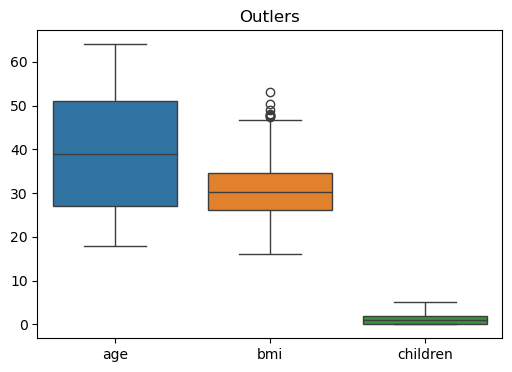

In [40]:
# Identify Outleris
plt.figure(figsize=(6,4))
sns.boxplot(data=df)
plt.title('Outlers', fontsize=12)
plt.show()

In [41]:
# Check outleirs with IQR
Q1 = df_processed['bmi'].quantile(0.25)
Q3 = df_processed['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_processed[(df['bmi'] < lower) | (df['bmi'] > upper)]
outliers

/tmp/ipykernel_108053/3598541307.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_processed[(df['bmi'] < lower) | (df['bmi'] > upper)]


,age,sex,bmi,children,smoker,region,charges
116,49.0,Female,27.17,0,no,NaN,8601.3293
286,28.0,Female,33.40,0,no,NaN,3172.0180
401,38.0,Male,21.12,3,no,NaN,6652.5288
543,62.0,Male,21.40,0,no,NaN,12957.1180
847,38.0,Female,28.00,3,no,Southwest,7151.0920
860,44.0,Male,21.85,3,no,NaN,8891.1395
1088,50.0,Female,26.22,2,no,NaN,10493.9458


In [42]:
df_processed.bmi.shape

(1316,)

In [43]:
# 1: Remove Outliers
df_processed['bmi'] = df_processed['bmi'].clip(lower=lower, upper=upper)
df_processed['bmi'].shape

(1316,)

In [44]:
# 2: Transform BMI to reduce the Effects of Outliers
df_processed['bmi'] = np.log1p(df_processed['bmi']) # log(1 + x) to handle zeros
df['bmi'].shape

(1338,)

In [45]:
# 3: Handle Outleir using RobustScaler
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
df_processed['bmi'] = rscaler.fit_transform(df_processed[['bmi']])
df_processed['bmi']

0      -0.288405
1       0.405119
2       0.321128
3      -1.031594
4      -0.163333
          ...   
1311    0.090236
1312    0.200060
1313    0.723450
1314   -0.571344
1315   -0.139559
Name: bmi, Length: 1316, dtype: float64

# 3. Handle NAs

In [49]:
# Removed NAs from Target
df_processed = df_processed.dropna(subset=['charges'])
df_processed.isnull().sum()

age          31
sex          27
bmi          32
children     26
smoker       30
region      646
charges       0
dtype: int64

In [56]:
# Features and target variables separation
X = df_processed.drop(columns=['charges'], axis=1)
y = df_processed['charges']

In [57]:
# Numercal and Categorical variables
num_columns = ['age', 'bmi','children']
cat_columns = ['sex', 'smoker', 'region']

In [61]:
# Imputer features with simple imputer
from sklearn.impute import SimpleImputer

# Define Imputers
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

# Imputer numberical and categorical variables
num_trans = num_imp.fit_transform(X[num_columns])
cat_trans = cat_imp.fit_transform(X[cat_columns])

# Covert back to DataFrames with origianl column names
num_trans_cols = pd.DataFrame(num_trans, columns=num_columns, index=X.index)
cat_trans_cols = pd.DataFrame(cat_trans, columns=cat_columns, index=X.index)

# Concate two DataFrames
df_imp = pd.concat([num_trans_cols, cat_trans_cols], axis=1)
df_imp.head()

,age,bmi,children,sex,smoker,region
0,19.0,-0.288405,0.0,Female,yes,Southwest
1,18.0,0.405119,1.0,Male,no,Southeast
2,28.0,0.321128,3.0,Male,no,Southeast
3,33.0,-1.031594,0.0,Male,no,Northwest
4,32.0,-0.163333,0.0,Male,no,Northwest
